# Lipika Sharma - Maths Assignment 2

## Gram-Schmidt Algorithm and QR decomposition

Q1 (i)Write a code to generate a random matrix A of size m × n with m > n
and calculate its Frobenius norm, ∥ · ∥F . The entries of A must be of
the form r.dddd (example 5.4316). The inputs are the positive integers
m and n and the output should display the the dimensions and the
calculated norm value.



In [19]:
import numpy as np

# defining a function in input arguements
# as row and column numbers
def randomization_matrix(m,n):
    x = np.random.random([m,n])
    return x
    
m = int(input('Number of Rows: '))
n = int(input('Number of Columns: '))


# printing the random matrix
mat = randomization_matrix(m,n)
print(mat)




Number of Rows: 5
Number of Columns: 4
[[0.25322791 0.99249914 0.78692971 0.10459126]
 [0.22720487 0.96883742 0.79980218 0.88917158]
 [0.28608186 0.31685692 0.5964002  0.57763191]
 [0.97515283 0.74874442 0.02978661 0.53523997]
 [0.41404111 0.32982676 0.08579154 0.7232963 ]]


In [20]:
from math import sqrt


def fbnsnorm (mat):
    sumofmatrix =0
    for i in range (len(mat)):
        for j in range (len(mat[0])):
            sumofmatrix+= pow(mat[i][j],2)
            
    result = sqrt(sumofmatrix)
    return round(result,5)
print("the no of rows :",len(mat))
print ("the no of columns:",len(mat[0]))

print (fbnsnorm (mat))

the no of rows : 5
the no of columns: 4
2.7534


ii) Write a code to decide if Gram-Schmidt Algorithm can be applied to
columns of a given matrix A through calculation of rank. The code
should print appropriate messages indicating whether Gram-Schmidt is
applicable on columns of the matrix or not.

In [21]:
# Python 3 program to find rank of a matrix
class rankMatrix(object):
	def __init__(self, Matrix):
		self.R = len(Matrix)
		self.C = len(Matrix[0])
		
	# Function for exchanging two rows of a matrix
	def swap(self, Matrix, row1, row2, col):
		for i in range(col):
			temp = Matrix[row1][i]
			Matrix[row1][i] = Matrix[row2][i]
			Matrix[row2][i] = temp
			
	# Function to Display a matrix
	def Display(self, Matrix, row, col):
		for i in range(row):
			for j in range(col):
				print (" " + str(Matrix[i][j]))
			print ('\n')
			
	# Find rank of a matrix
	def rankOfMatrix(self, Matrix):
		rank = self.C
		for row in range(0, rank, 1):
			
			# Before we visit current row
			# 'row', we make sure that
			# mat[row][0],....mat[row][row-1]
			# are 0.
	
			# Diagonal element is not zero
			if Matrix[row][row] != 0:
				for col in range(0, self.R, 1):
					if col != row:
						
						# This makes all entries of current
						# column as 0 except entry 'mat[row][row]'
						multiplier = (Matrix[col][row] /
									Matrix[row][row])
						for i in range(rank):
							Matrix[col][i] -= (multiplier *
											Matrix[row][i])
												
			# Diagonal element is already zero.
			# Two cases arise:
			# 1) If there is a row below it
			# with non-zero entry, then swap
			# this row with that row and process
			# that row
			# 2) If all elements in current
			# column below mat[r][row] are 0,
			# then remove this column by
			# swapping it with last column and
			# reducing number of columns by 1.
			else:
				reduce = True
				
				# Find the non-zero element
				# in current column
				for i in range(row + 1, self.R, 1):
					
					# Swap the row with non-zero
					# element with this row.
					if Matrix[i][row] != 0:
						self.swap(Matrix, row, i, rank)
						reduce = False
						break
						
				# If we did not find any row with
				# non-zero element in current
				# column, then all values in
				# this column are 0.
				if reduce:
					
					# Reduce number of columns
					rank -= 1
					
					# copy the last column here
					for i in range(0, self.R, 1):
						Matrix[i][row] = Matrix[i][rank]
						
				# process this row again
				row -= 1
				
		# self.Display(Matrix, self.R,self.C)
		return (rank)

# Driver Code
if __name__ == '__main__':
	Matrix = [[10, 20, 10],
			[-20, -30, 10],
			[30, 50, 0]]
	RankMatrix = rankMatrix(Matrix)
	print ("Rank of the Matrix is:",
		(RankMatrix.rankOfMatrix(Matrix)))





      
                
                
                 
                 
               

Rank of the Matrix is: 2


In [22]:
def gram_schmidt_applicable(m):
    RankMatrix = rankMatrix(m)
    rank = RankMatrix.rankOfMatrix(m)
    print("Rank of matrix", rank)
    columns = len(m[0])
    print("Columns of matrix is ", columns)
    if rank == columns:
        print("\nGram Schmidt Process is applicable. Columns: {}, Rank: {}".format(columns, rank))
    else:
        print("\nGram Schmidt Process is not applicable. Columns: {}, Rank: {}".format(columns, rank))

matrix =(mat)
print("\nGenerated Matrix: {}\n".format(matrix))
gram_schmidt_applicable(matrix)


Generated Matrix: [[0.25322791 0.99249914 0.78692971 0.10459126]
 [0.22720487 0.96883742 0.79980218 0.88917158]
 [0.28608186 0.31685692 0.5964002  0.57763191]
 [0.97515283 0.74874442 0.02978661 0.53523997]
 [0.41404111 0.32982676 0.08579154 0.7232963 ]]

Rank of matrix 4
Columns of matrix is  4

Gram Schmidt Process is applicable. Columns: 4, Rank: 4


part c

In [24]:
from numpy import array, zeros
import copy


def calculate_l2_norm_1D(sample):
    sum_up = 0
    for i in sample:
        sum_up += i **2
    return sqrt(sum_up)

def gram_schmidt_Q_vector(mat):
    rows, cols = mat.shape
    Q_vec = zeros((rows, cols))
    for j in range(cols):
        v = mat[:, j]
        for k in range(j):
            q = Q_vec[:, k]
            v = v - q.dot(v) * q

        Q_vec[:, j] = v / calculate_l2_norm_1D(v)
    return Q_vec

def compute_R_vector(matrix, Q_Vector):
    return Q_Vector.T @ matrix


while True:
    matrices = randomization_matrix(m,n)
    matrices_to_process = copy.deepcopy(matrices) ## Somehow values are getting changed due to shallow copy
    rankobj = rankMatrix(matrices_to_process)
    if rankobj.rankOfMatrix(matrices_to_process) == matrices_to_process.shape[1]:
        print("\nGenerated Matrices: \n{}\n".format(matrices))
        break
        
print("Gram Schmidt Orthogonalisation for the generated Matrix: \n{}\n".format(gram_schmidt_Q_vector(matrices)))








Generated Matrices: 
[[0.01922597 0.31384041 0.76530682 0.46466871]
 [0.66615977 0.87617022 0.60648072 0.15433642]
 [0.0042923  0.3669355  0.66756648 0.82781234]
 [0.57951573 0.33641881 0.31958251 0.68203526]
 [0.20928453 0.95196222 0.31437733 0.92812838]]

Gram Schmidt Orthogonalisation for the generated Matrix: 
[[ 0.02118257  0.31707928  0.69394611 -0.15696667]
 [ 0.7339538   0.08642499  0.00556513 -0.63208038]
 [ 0.00472912  0.39444042  0.51553926  0.3185787 ]
 [ 0.63849213 -0.38902079  0.14098926  0.62472587]
 [ 0.23058308  0.76489936 -0.48244081  0.28993285]]



iv) Write a code to create a QR decomposition of the matrix A by utilizing
the code developed in the previous sub-parts of this question. Find the
matrices Q and R and then display the value ∥A − (Q.R)∥F , where
∥ · ∥F is the Frobenius norm. The code should also display the total
number of additions, multiplications and divisions to find the result

In [40]:
def total_operation(matrix):
    m,n = matrix.shape
    addition_Q = ((n * (m-1) * m)/2) + (n-1)*m
    division_Q = m*n
    multiplication_Q = n*m**2
    total_operation_Q = addition_Q + division_Q + multiplication_Q
    
    
    addition_R = (m*(m+1)*(n-1))/2
    multiplcation_R = (m*(m+1)*n)/2
    total_operation_R = addition_R + multiplcation_R
    
    total_operation = total_operation_Q + total_operation_R
    print("\nTotal Number of Addition, Division, Multiplication are: {}\n".format(int(total_operation)))

A= randomization_matrix(m,n)
Q = gram_schmidt_Q_vector(A)
R = compute_R_vector(A, Q)
print("\nValue of ||A - (Q.R)|| (Frobenius): {}\n".format(fbnsnorm(A - Q.dot(R))))
total_operation(A)

[[0.23883402 0.24198888 0.42304007 0.07593953]
 [0.38383901 0.95064118 0.22698462 0.44343557]
 [0.74667113 0.48810867 0.49940192 0.83023907]
 [0.15100674 0.89865382 0.92421622 0.62266766]
 [0.05627124 0.33445383 0.61972264 0.9769303 ]]
[[ 0.26907373 -0.04359122  0.32451414 -0.59578951]
 [ 0.43243836  0.49323597 -0.68351842  0.12463165]
 [ 0.84121007 -0.40545156  0.13364569  0.13554179]
 [ 0.17012629  0.72016341  0.36826738 -0.31182517]
 [ 0.06339596  0.26793989  0.52346071  0.71686491]]
[[ 8.87615533e-01  1.06089616e+00  8.28609149e-01  1.07846293e+00]
 [-6.45359908e-17  9.97228529e-01  7.22667971e-01  5.88967399e-01]
 [ 4.26674070e-17  1.58597879e-16  7.13636360e-01  5.73197749e-01]
 [-1.26773827e-16 -1.79117491e-16 -2.86666049e-17  6.28717822e-01]]
[[0.23883402 0.24198888 0.42304007 0.07593953]
 [0.38383901 0.95064118 0.22698462 0.44343557]
 [0.74667113 0.48810867 0.49940192 0.83023907]
 [0.15100674 0.89865382 0.92421622 0.62266766]
 [0.05627124 0.33445383 0.61972264 0.9769303 ]]

Va

# Q2 Gradient Descent Algorithm

i) Consider the last 4 digits of your mobile number (Note : In case there
is a 0 in one of the digits replace it by 3). Let it be n1n2n3n4. Generate
a random matrix A of size n1n2 × n3n4. For example, if the last four
digits are 2311, generate a random matrix of size 23 × 11. Write a code
to calculate the l∞ norm of this matrix.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
A = np.random.randint(10,size=(11,11)) # random matrix A of size n1n2 × n3n4
b = np.random.randint(10,size=(11,1)) # vector b of size n1n2 × 1
print('A\n', A, '\n')
#print('b\n', b, '\n')
n1n2, n3n4 = A.shape
rowsums = []
for i in np.arange(n1n2):
 v = np.sum(np.absolute(A[i, :]))
 rowsums.append(v)
print("l∞ norm of matrix A of size n1n2 × n3n4 :",np.max(rowsums))


A
 [[6 6 8 5 1 0 8 2 8 9 1]
 [7 9 1 5 1 8 3 6 1 2 4]
 [2 3 9 1 8 5 1 3 6 0 6]
 [3 4 2 4 8 7 9 6 2 0 6]
 [9 7 8 7 9 7 1 7 1 8 6]
 [3 3 0 0 5 9 1 5 5 2 0]
 [5 8 1 3 1 7 8 8 1 0 0]
 [3 5 2 0 7 1 9 4 6 5 9]
 [6 6 2 4 5 1 4 6 0 1 9]
 [2 8 6 5 6 7 4 7 2 2 3]
 [6 2 5 5 6 3 1 4 9 6 6]] 

l∞ norm of matrix A of size n1n2 × n3n4 : 70


In [63]:
def Gradient_Descent(gradient, start, learn_rate, n_iterations=50, tolerance=1e-5):
    vector = start
    for _ in range(n_iterations):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            breakvector += difff
        vector += diff
    return vector
 
def tau(gk,A):
    numarator = gk.transpose() @ gk
    denominator = gk.transpose() @ A.transpose() @ A @ gk
    tau = np.divide(numarator, denominator) # τ = gk^T gk / gk^T A^T Agk
    return tau

def GDIterations(A,b,error=1e-5):
    x = np.random.randint(10,size=(11,1))
    norm = np.round(a= np.linalg.norm(x=x, ord=2), decimals=5)
    function = 0.5 * np.square(A @ x - b) # f(x) = 1/2∥Ax − b∥^2 2
    function_norm = np.round(a=np.linalg.norm(x=function, ord=2), decimals=5)
    iteration = 0
    x_list = list()
    fx_list = list()
    
    while abs(norm) > error:
        df = A.transpose() @ A @ x - A.transpose() @ b # ∇f(x) = A⊤Ax − A⊤b.
        tau_value = tau(gk=df, A=A)
        xprev = x
        x = x - tau_value * df
        x_minus_prev = x - xprev
        function = 0.5 * np.square(A @ x - b)
        function_norm = np.round(a=np.linalg.norm(x=function, ord=2), decimals=5)
        norm = np.round(a=np.linalg.norm(x=x_minus_prev, ord=2), decimals=5)
        x_list.append(x)
        fx_list.append(function_norm)
        iteration = iteration + 1
    return x_list, fx_list, iteration

x_list, fx_list, iteration = GDIterations(A=A,b=b,error=1e-5)
print(len(x_list))
print(len(fx_list))
print((iteration))
print(fx_list[50:60])

#Gradient_Descent(gradient=lambda v: A.transpose() @ A @ x - A.transpose() @ b,start=np.random.randn(11,1),
                 #learn_rate=tau_value,tolerance=1e-5)   
    

7525
7525
7525
[380.05583, 303.46488, 322.22765, 259.28175, 273.82824, 222.21644, 233.30071, 191.09864, 199.34707, 164.94968]


iii) Generate the graph of f(xk) vs k where k is the iteration number and
xk is the current estimate of x at iteration k. This graph should convey
the decreasing nature of function values.

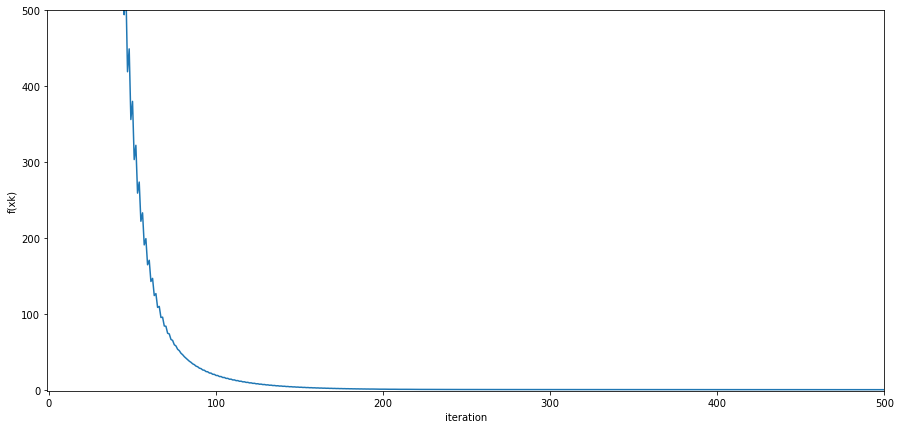

In [68]:
step_size = [x for x in range(iteration)]
plt.figure(figsize =[15,7])
sns.lineplot(x = step_size, y = fx_list)
plt.xlabel("iteration")
plt.ylabel("f(xk)")
plt.xlim([-1,500]) #these values are taken to zoom in the graphs because it was not visible
plt.ylim([-1,500])#these values are taken to zoom in the graphs because it was not visible
plt.show()
